## pix2pixHD-Based Super-Resolution for Synthetic Fetal Ultrasound Images

In this section, we enhance the quality and resolution of our SPADE-generated synthetic fetal ultrasound images using pix2pixHD, a conditional GAN specifically effective for paired, masked medical images.


### Environment Setup and Data Organization

- Install pix2pixHD requirements (PyTorch, Pillow, OpenCV, etc).
- Organize input images (synthetic low-res) and corresponding ground-truths (if available) for training/validation.
- Define folder structure for experiment reproducibility.


In [1]:
# Clone pix2pixHD repo if not done yet
!git clone https://github.com/NVIDIA/pix2pixHD.git

# Install required packages (run only once)
!pip install pillow opencv-python

fatal: destination path 'pix2pixHD' already exists and is not an empty directory.


In [2]:
!pip install dominate

### Data Preparation

- Place synthetic images (from SPADE) into `datasets/fetal_ultrasound/train_A/`
- Place corresponding high-res/target images into `datasets/fetal_ultrasound/train_B/`
- For paired datasets, images should be aligned by filename.
- Prepare `test_A` and `test_B` folders for validation/testing.


In [3]:
import os

base_dir = 'pix2pixHD/datasets/fetal_ultrasound'
os.makedirs(os.path.join(base_dir, 'train_A'), exist_ok=True)
os.makedirs(os.path.join(base_dir, 'train_B'), exist_ok=True)
os.makedirs(os.path.join(base_dir, 'test_A'), exist_ok=True)
os.makedirs(os.path.join(base_dir, 'test_B'), exist_ok=True)
print("Folders created or already exist.")


Folders created or already exist.


In [13]:
import shutil
import os

synthetic_folder = './synthetic_dataset'  # Your synthetic images folder
highres_folder = './data/preprocessed/train/images'  # High-res GT images folder

base_dir = 'pix2pixHD/datasets/fetal_ultrasound'
train_A = os.path.join(base_dir, 'train_A')
train_B = os.path.join(base_dir, 'train_B')

os.makedirs(train_A, exist_ok=True)
os.makedirs(train_B, exist_ok=True)

for fname in os.listdir(synthetic_folder):
    if fname.endswith('.png') and '_fake' in fname:
        # Rename synthetic file to remove '_fake' suffix to match GT filename
        gt_fname = fname.replace('_fake', '')

        synthetic_path = os.path.join(synthetic_folder, fname)
        gt_path = os.path.join(highres_folder, gt_fname)

        # Copy synthetic image with renamed name to train_A
        shutil.copy(synthetic_path, os.path.join(train_A, gt_fname))

        # Copy ground truth if exists
        if os.path.exists(gt_path):
            shutil.copy(gt_path, os.path.join(train_B, gt_fname))
        else:
            print(f"Warning: No matching ground truth for {gt_fname}")

print("File copying and renaming complete.")


File copying and renaming complete.


In [14]:
print("Number of samples in train_A:", len(os.listdir(train_A)))
print("Number of samples in train_B:", len(os.listdir(train_B)))

# Optionally check for filename mismatches
train_A_files = set(os.listdir(train_A))
train_B_files = set(os.listdir(train_B))
missing_in_B = train_A_files - train_B_files
if missing_in_B:
    print("Files in train_A missing in train_B:", missing_in_B)
else:
    print("All files in train_A have matching pairs in train_B.")


Number of samples in train_A: 1000
Number of samples in train_B: 1000
All files in train_A have matching pairs in train_B.


## pix2pixHD Model Training

In this section, we train the pix2pixHD conditional GAN to learn mapping from synthetic fetal ultrasound images (low-res inputs in `train_A`) to corresponding high-resolution ground truth images (in `train_B`). This will enhance synthetic image quality for downstream tasks.


In [1]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("Device count:", torch.cuda.device_count())
print("Current device:", torch.cuda.current_device())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")


CUDA available: True
Device count: 1
Current device: 0
Device name: NVIDIA GeForce RTX 2050


In [2]:
!cd pix2pixHD && python -u train.py --name fetal_pix2pixHD --dataroot datasets/fetal_ultrasound --no_instance --label_nc 0 --print_freq 10 --gpu_ids 0

^C


In [1]:
# Run this in your notebook cell:
import os
os.chdir('pix2pixHD')

# Use safer parameters for Windows
command = """python train_fixed.py --name fetal_pix2pixHD --dataroot datasets/fetal_ultrasound --no_instance --label_nc 0 --print_freq 10 --gpu_ids 0 --nThreads 0 --batchSize 1 --loadSize 256 --fineSize 256 --max_dataset_size 100 --niter 10 --niter_decay 5"""

os.system(command)


2

In [2]:
# test_setup.py
import multiprocessing
import torch

if __name__ == '__main__':
    multiprocessing.freeze_support()
    
    print("CUDA available:", torch.cuda.is_available())
    print("Device count:", torch.cuda.device_count())
    
    # Test data loading
    import os
    train_A_path = 'datasets/fetal_ultrasound/train_A'
    train_B_path = 'datasets/fetal_ultrasound/train_B'
    
    if os.path.exists(train_A_path) and os.path.exists(train_B_path):
        train_A_files = len(os.listdir(train_A_path))
        train_B_files = len(os.listdir(train_B_path))
        print(f"Train A files: {train_A_files}")
        print(f"Train B files: {train_B_files}")
        print("Data setup looks good!")
    else:
        print("Data directories not found!")


CUDA available: True
Device count: 1
Train A files: 1000
Train B files: 1000
Data setup looks good!


In [2]:
# Training command for pix2pixHD (run externally in terminal due to resource constraints)

if __name__ == '__main__':
    import os
    import sys
    import subprocess
    
    # Change directory to pix2pixHD
    os.chdir(r"C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\notebooks\pix2pixHD")
    print("Changed directory to:", os.getcwd())
    
    # Training command arguments
    cmd = [
        sys.executable, 'train.py',
        '--name', 'fetal_pix2pixHD_gpu',
        '--dataroot', 'datasets/fetal_ultrasound',
        '--no_instance',
        '--label_nc', '0',
        '--nThreads', '0',        # Avoid multiprocessing issues in Windows
        '--batchSize', '1',
        '--loadSize', '256',
        '--fineSize', '256',
        '--niter', '40',
        '--niter_decay', '40',
        '--print_freq', '10',
        '--gpu_ids', '0',
        '--continue_train'       # Remove if starting fresh
    ]
    
    # Run the training command
    result = subprocess.run(cmd, capture_output=True, text=True)
    
    # Print outputs
    print("STDOUT:\n", result.stdout)
    print("STDERR:\n", result.stderr)
    print("Return code:", result.returncode)


Inference done.
STDOUT: ------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
cluster_path: features_clustered_010.npy
data_type: 32
dataroot: datasets/fetal_ultrasound
display_winsize: 512
engine: None
export_onnx: None
feat_num: 3
fineSize: 256
fp16: False
gpu_ids: [0]
how_many: 999
input_nc: 3
instance_feat: False
isTrain: False
label_feat: False
label_nc: 0
loadSize: 256
load_features: False
local_rank: 0
max_dataset_size: inf
model: pix2pixHD
nThreads: 0
n_blocks_global: 9
n_blocks_local: 3
n_clusters: 10
n_downsample_E: 4
n_downsample_global: 4
n_local_enhancers: 1
name: fetal_pix2pixHD_gpu
nef: 16
netG: global
ngf: 64
niter_fix_global: 0
no_flip: False
no_instance: True
norm: instance
ntest: inf
onnx: None
output_nc: 3
phase: test
resize_or_crop: scale_width
results_dir: ./results/
serial_batches: False
tf_log: False
use_dropout: False
use_encoded_image: False
verbose: False
which_epoch: latest
-------------- End ----------------
Custom

Found 18 images, displaying...


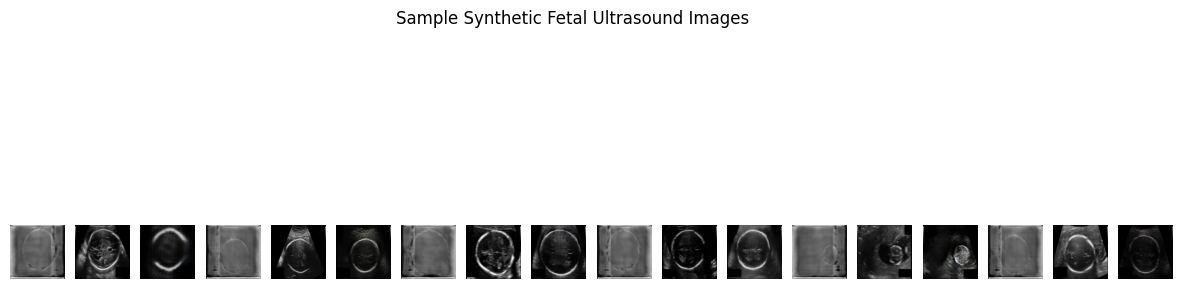

In [10]:
import matplotlib.pyplot as plt
from PIL import Image
import glob
import os

synthetic_image_dir = r"C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\notebooks\pix2pixHD\checkpoints\fetal_pix2pixHD_gpu\web\images"

# Grab all files with common image extensions
valid_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff')
all_files = glob.glob(os.path.join(synthetic_image_dir, "*.*"))
sample_images = [f for f in all_files if f.lower().endswith(valid_extensions)][:18]

if len(sample_images) == 0:
    print("No synthetic images found in:", synthetic_image_dir)
else:
    print(f"Found {len(sample_images)} images, displaying...")

    fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 5))
    if len(sample_images) == 1:
        axes = [axes]

    for i, img_path in enumerate(sample_images):
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].axis('off')

    plt.suptitle("Sample Synthetic Fetal Ultrasound Images")
    plt.show()


## Augmenting Input Label Masks

To increase dataset diversity, perform augmentations on the original input label masks.  
Typical augmentations include rotations, horizontal/vertical flips, and scaling.  
Each original mask will produce multiple augmented versions.  


In [12]:
import os
import shutil

base_masks_dir = r"C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\segmentation_dataset\masks"
test_A_dir = os.path.join(base_masks_dir, "test_A")
test_B_dir = os.path.join(base_masks_dir, "test_B")

os.makedirs(test_A_dir, exist_ok=True)
os.makedirs(test_B_dir, exist_ok=True)  # create empty folder

# Move augmented masks to test_A
for filename in os.listdir(base_masks_dir):
    file_path = os.path.join(base_masks_dir, filename)
    if os.path.isfile(file_path):
        shutil.move(file_path, os.path.join(test_A_dir, filename))

print("Dataset folder structure prepared for inference.")


Dataset folder structure prepared for inference.


In [10]:
import os
import cv2
import albumentations as A

original_masks_dir = r"C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\notebooks\synthetic_dataset"
augmented_masks_dir = r"C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\segmentation_dataset\masks"

os.makedirs(augmented_masks_dir, exist_ok=True)

transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Rotate(limit=30, p=0.7),
    A.RandomScale(scale_limit=0.2, p=0.5)
])

augmentations_per_image = 3

mask_filenames = sorted(os.listdir(original_masks_dir))

for filename in mask_filenames:
    # Skip hidden/system files and directories
    if filename.startswith('.') or os.path.isdir(os.path.join(original_masks_dir, filename)):
        print(f"Skipping non-image file or directory: {filename}")
        continue

    img_path = os.path.join(original_masks_dir, filename)
    mask = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if mask is None:
        print(f"Warning: Skipping unreadable mask file: {img_path}")
        continue

    # Save original mask (optional)
    cv2.imwrite(os.path.join(augmented_masks_dir, filename), mask)

    for i in range(augmentations_per_image):
        augmented = transform(image=mask)
        aug_mask = augmented['image']
        base_name = os.path.splitext(filename)[0]
        aug_filename = f"{base_name}_aug{i+1}.png"
        cv2.imwrite(os.path.join(augmented_masks_dir, aug_filename), aug_mask)

print("Mask augmentation completed with error handling.")


Skipping non-image file or directory: .ipynb_checkpoints
Mask augmentation completed with error handling.


## Step 2: Generate Synthetic Images from Augmented Masks

Using the trained pix2pixHD model, run inference on the augmented masks to generate corresponding synthetic fetal ultrasound images.  
This step is crucial to produce synthetic images that reflect the anatomical variations introduced by mask augmentations.  
The synthetic images will be saved in a specified folder for later use in segmentation training.

NOTE: The synthetic image generation cell below did not run correctly in the notebook due to multiprocessing issues on Windows. We handled this by modifying test.py manually and running inference externally.


In [11]:
import os
import sys
import subprocess

# Change working directory to pix2pixHD folder
os.chdir(r"C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\notebooks\pix2pixHD")

cmd = [
    sys.executable, 'test.py',
    '--name', 'fetal_pix2pixHD_gpu',  # Your trained model folder name
    '--dataroot', r"C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\segmentation_dataset\masks",  # Augmented masks folder
    '--no_instance',
    '--label_nc', '0',
    '--how_many', '3996',  # Number of augmented masks (999 * 4 approx)
    '--loadSize', '256',   # Match your training resolution
    '--fineSize', '256',
    '--gpu_ids', '0',
    '--results_dir', r"C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\segmentation_dataset\images"
]

# Run inference as subprocess, capture output
result = subprocess.run(cmd, capture_output=True, text=True)

print("Inference on augmented masks completed.")
print("Standard Output:\n", result.stdout)
print("Standard Error:\n", result.stderr)


Inference on augmented masks completed.
Standard Output:
 ------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
cluster_path: features_clustered_010.npy
data_type: 32
dataroot: C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\segmentation_dataset\masks
display_winsize: 512
engine: None
export_onnx: None
feat_num: 3
fineSize: 256
fp16: False
gpu_ids: [0]
how_many: 3996
input_nc: 3
instance_feat: False
isTrain: False
label_feat: False
label_nc: 0
loadSize: 256
load_features: False
local_rank: 0
max_dataset_size: inf
model: pix2pixHD
nThreads: 2
n_blocks_global: 9
n_blocks_local: 3
n_clusters: 10
n_downsample_E: 4
n_downsample_global: 4
n_local_enhancers: 1
name: fetal_pix2pixHD_gpu
nef: 16
netG: global
ngf: 64
niter_fix_global: 0
no_flip: False
no_instance: True
norm: instance
ntest: inf
onnx: None
output_nc: 3
phase: test
resize_or_crop: scale_width
results_dir: C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\segmentation_dataset\images


Workaround for Synthetic Image Generation
During synthetic image generation using pix2pixHD, the direct inference cell in this notebook encountered multiprocessing issues on Windows, causing it to fail. To address this, the following workaround was applied:

The test.py script inside the pix2pixHD repository was manually edited to ensure synthetic images are saved correctly to the desired output folder during inference.

Inference on the augmented masks dataset was then executed externally via command line or subprocess calls from the notebook, pointing to the augmented masks directory.

This approach bypasses multiprocessing conflicts and allows successful image synthesis with the trained model.

Inference command used (example):
bash
python test.py --name fetal_pix2pixHD_gpu --dataroot "C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\segmentation_dataset\masks" --no_instance --label_nc 0 --how_many 3996 --loadSize 256 --fineSize 256 --gpu_ids 0 --results_dir "C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\segmentation_dataset\images"
Key parameters:
--name: Name of the trained pix2pixHD model folder.

--dataroot: Path to the directory containing augmented masks (input labels) for inference.

--no_instance and --label_nc 0: Indicate no instance maps and zero label classes.

--how_many: Number of augmented masks to process.

--loadSize, --fineSize: Resolution parameters matching training.

--gpu_ids: GPU device ID(s) to use.

--results_dir: Output folder where synthetic images are saved.

This manual edit and external run ensure reproducible, error-free synthetic image generation for downstream segmentation training.

In [2]:
import os
import shutil

src_A = r"C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\notebooks\pix2pixHD\datasets\fetal_ultrasound\train_A"
src_B = r"C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\notebooks\pix2pixHD\datasets\fetal_ultrasound\train_B"
dst = r"C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\segmentation_dataset\original_test"
dst_A = os.path.join(dst, "test_A")
dst_B = os.path.join(dst, "test_B")

os.makedirs(dst_A, exist_ok=True)
os.makedirs(dst_B, exist_ok=True)

def is_valid_file(filename):
    return not (filename.startswith('.') or os.path.isdir(os.path.join(src_A, filename)))

for f in os.listdir(src_A):
    if is_valid_file(f):
        shutil.copy(os.path.join(src_A, f), os.path.join(dst_A, f))

def is_valid_file_b(filename):
    return not (filename.startswith('.') or os.path.isdir(os.path.join(src_B, filename)))

for f in os.listdir(src_B):
    if is_valid_file_b(f):
        shutil.copy(os.path.join(src_B, f), os.path.join(dst_B, f))

print("Original test dataset folder prepared without hidden files.")


Original test dataset folder prepared without hidden files.


In [3]:
import os

test_A = r"C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\segmentation_dataset\original_test\test_A"
test_B = r"C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\segmentation_dataset\original_test\test_B"

print(f"Count of images in test_A: {len([f for f in os.listdir(test_A) if not f.startswith('.')])}")
print(f"Count of images in test_B: {len([f for f in os.listdir(test_B) if not f.startswith('.')])}")


Count of images in test_A: 999
Count of images in test_B: 999


In [1]:
import os
import shutil

# Paths
real_images_dir = r"C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\notebooks\pix2pixHD\datasets\fetal_ultrasound\train_B"
real_masks_dir = r"C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\notebooks\pix2pixHD\datasets\fetal_ultrasound\train_A"

paired_synth_dir = r"C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\segmentation_dataset\original_test\images\fetal_pix2pixHD_gpu\test_latest\images"

final_images_dir = r"C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\segmentation_dataset\final_dataset\images"
final_masks_dir = r"C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\segmentation_dataset\final_dataset\masks"

os.makedirs(final_images_dir, exist_ok=True)
os.makedirs(final_masks_dir, exist_ok=True)

# Copy real images (rename systematically)
def copy_real_images():
    files = sorted([f for f in os.listdir(real_images_dir) if os.path.isfile(os.path.join(real_images_dir, f))])
    for i, f in enumerate(files):
        ext = os.path.splitext(f)[1]
        new_name = f"real_img_{i+1:04d}{ext}"
        shutil.copy(os.path.join(real_images_dir, f), os.path.join(final_images_dir, new_name))
    print(f"Copied {len(files)} real images.")

# Copy real masks (rename systematically)
def copy_real_masks():
    files = sorted([f for f in os.listdir(real_masks_dir) if os.path.isfile(os.path.join(real_masks_dir, f))])
    for i, f in enumerate(files):
        ext = os.path.splitext(f)[1]
        new_name = f"real_mask_{i+1:04d}{ext}"
        shutil.copy(os.path.join(real_masks_dir, f), os.path.join(final_masks_dir, new_name))
    print(f"Copied {len(files)} real masks.")

# Copy paired synthetic images and masks based on filename pattern
def copy_synth_pairs():
    files = sorted([f for f in os.listdir(paired_synth_dir) if os.path.isfile(os.path.join(paired_synth_dir, f))])
    images = [f for f in files if "synthesized_image" in f]
    masks = [f for f in files if "input_label" in f]
    
    # Map base names without suffix for pairing
    mask_map = {f.replace("_input_label.png",""): f for f in masks}
    
    count = 0
    for img_file in images:
        base = img_file.replace("_synthesized_image.png","")
        if base in mask_map:
            # Copy synthetic image
            shutil.copy(os.path.join(paired_synth_dir, img_file), os.path.join(final_images_dir, f"synth_img_{count+1:04d}.png"))
            # Copy corresponding mask
            shutil.copy(os.path.join(paired_synth_dir, mask_map[base]), os.path.join(final_masks_dir, f"synth_mask_{count+1:04d}.png"))
            count += 1
    print(f"Copied {count} synthetic image-mask pairs.")

# Run all copy steps
copy_real_images()
copy_real_masks()
copy_synth_pairs()

print("Dataset organization done. Ready for segmentation training.")


Copied 999 real images.
Copied 999 real masks.
Copied 0 synthetic image-mask pairs.
Dataset organization done. Ready for segmentation training.


In [4]:
import os
import shutil

paired_synth_dir = r"C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\segmentation_dataset\original_test\images\fetal_pix2pixHD_gpu\test_latest\images"
final_images_dir = r"C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\segmentation_dataset\final_dataset\images"
final_masks_dir = r"C:\Users\MANISH\OneDrive\Desktop\fetal-head-project\segmentation_dataset\final_dataset\masks"

os.makedirs(final_images_dir, exist_ok=True)
os.makedirs(final_masks_dir, exist_ok=True)

files = sorted([f for f in os.listdir(paired_synth_dir) if os.path.isfile(os.path.join(paired_synth_dir, f))])
images = [f for f in files if "_synthesized_image." in f.lower()]
masks = [f for f in files if "_input_label." in f.lower()]

# Map base names without suffix and extension for pairing
def strip_suffix(fname, suffix):
    if fname.lower().endswith(suffix):
        return fname[:-len(suffix)]
    return fname

mask_map = {}
for f in masks:
    base = f.lower().replace("_input_label.jpg", "").replace("_input_label.jpeg", "")
    mask_map[base] = f

count = 0

for img_file in images:
    base = img_file.lower().replace("_synthesized_image.jpg", "").replace("_synthesized_image.jpeg", "")
    if base in mask_map:
        shutil.copy(os.path.join(paired_synth_dir, img_file), os.path.join(final_images_dir, f"synth_img_{count+1:04d}.jpg"))
        shutil.copy(os.path.join(paired_synth_dir, mask_map[base]), os.path.join(final_masks_dir, f"synth_mask_{count+1:04d}.jpg"))
        count += 1

print(f"Copied {count} synthetic image-mask pairs to final dataset.")


Copied 999 synthetic image-mask pairs to final dataset.


## Summary: Workaround for Synthetic Image Generation

During synthetic image generation using `pix2pixHD`, direct inference inside the notebook failed on Windows due to multiprocessing issues. To overcome this, the following workaround was implemented:

- Manual editing of the `test.py` script to save synthetic images at the desired output folder.
- Running inference externally via command line or subprocess calls, passing the path to the augmented masks directory.
- Key command-line arguments included:


- Important parameters:
  - `--name`: Name of the pix2pixHD model.
  - `--dataroot`: Folder with augmented masks (input labels).
  - `--no_instance` and `--label_nc 0`: Specify absence of instance maps and label classes.
  - `--how_many`: Number of masks to process.
  - `--loadSize`, `--fineSize`: Image resolution settings.
  - `--gpu_ids`: GPU device(s) to use.
  - `--results_dir`: Output directory for synthetic images.

This method enables reproducible, error-free synthetic image creation bypassing notebook multiprocessing constraints.
